# Text Summarization

In [1]:
# from dask.distributed import Client, progress
import os
import re
import warnings
warnings.filterwarnings("ignore")
from tqdm.auto import tqdm
import texthero.preprocessing as tp
import pandas as pd

In [2]:
# client = Client(threads_per_worker=4, n_workers=1)
# client

In [3]:
# Open one file
with open(os.path.join('..','dataset','stories_text_summarization_dataset_train','0a3ff2f0a147c158845afa44d2a012064896566b.story'),encoding='utf-8') as reader:
    data = reader.readlines()

In [4]:
data

['LOS ANGELES, California (CNN)  -- After about 30 hours of deliberation, a jury on Monday convicted music producer Phil Spector of second-degree murder in the death of actress Lana Clarkson more than six years ago.\n',
 '\n',
 'Phil Spector will not remain free on bail pending his May 29 sentencing.\n',
 '\n',
 'Wearing a black suit with a red tie and pocket square, Spector showed no reaction as the verdict was announced. Now 69, he faces a sentence of 18 years to life in prison when he is sentenced May 29.\n',
 '\n',
 'Asked if he agreed to the sentencing date, Spector quietly answered, "Yes."\n',
 '\n',
 "Prosecutor Alan Jackson said he believed the jury reached the correct verdict, and he acknowledged the strength and backing of Clarkson's family. But defense attorney Doron Weinberg said Spector's defense team disagreed and planned to appeal.\n",
 '\n',
 '"We don\'t believe justice was done," Weinberg said.\n',
 '\n',
 'Superior Court Judge Larry Paul Fidler declined to allow Spect

In [5]:
# import pandas as pd
# import cufflinks as cf
# import numpy as np
# cf.set_config_file(theme='ggplot',sharing='public',offline=True)
# cf.datagen.lines(1,1000).iplot()


In [6]:
def load_articles(file_name):
    file = open(file_name, encoding='utf-8')
    text = file.read()
    file.close()
    return text

In [7]:
# split a document into news story and highlights
def split_story(doc):
    index = doc.find('@highlight')
    story, highlights = doc[:index], doc[index:].split('@highlight')
    highlights = [h.strip() for h in highlights if len(h) > 0]
    return story, highlights

In [8]:
train_files_path = os.path.join('..','dataset','stories_text_summarization_dataset_train')
test_files_path = os.path.join('..','dataset','stories_text_summarization_dataset_test')
datasets_path = os.path.join('..','dataset')

In [9]:
# from multiprocessing import Pool
# import multiprocessing as mp

# import pandas as pd
# results = pd.DataFrame()

# def process(filename):
#     train_files_path = os.path.join('..','dataset','stories_text_summarization_dataset_train')
#     filename = train_files_path + '/' + name
#     doc = load_articles(filename)
#     story, highlights = split_story(doc)
#     stories.append({'story':story, 'highlights':highlights})
#     return stories


# files = [f for f in os.listdir(train_files_path)[:5] if f.endswith(".story")]
# pool = Pool(mp.cpu_count())
# results = pd.concat(pool.map(process, files))
# pool.close()

In [10]:
train_files_path = os.path.join('..','dataset','stories_text_summarization_dataset_train')
test_files_path = os.path.join('..','dataset','stories_text_summarization_dataset_test')
datasets_path = os.path.join('..','dataset')

if not os.path.isfile(os.path.join(datasets_path,'stories_with_summary_train.csv')):
    stories = []
    for name in tqdm(os.listdir(train_files_path)):
        filename = train_files_path + '/' + name
        doc = load_articles(filename)
        story, highlights = split_story(doc)
        stories.append({'story':story, 'highlights':highlights})
    df_stories = pd.DataFrame(stories)
    df_stories.columns = ['article','summary']
    df_stories.to_csv(os.path.join(datasets_path,'stories_with_summary_train.csv'),index=False) 
    print('Loaded Stories %d' % len(stories))
else:
    df_stories = pd.read_csv(os.path.join(datasets_path,'stories_with_summary_train.csv'))

In [11]:
pd.set_option('display.max_colwidth', -1)

In [12]:
df_stories.head(2)

e military force in Syria.\n\nObama sent a letter to the heads of the House and Senate on Saturday night, hours after announcing that he believes military action against Syrian targets is the right step to take over the alleged use of chemical weapons.\n\nThe proposed legislation from Obama asks Congress to approve the use of military force "to deter, disrupt, prevent and degrade the potential for future uses of chemical weapons or other weapons of mass destruction."\n\nIt's a step that is set to turn an international crisis into a fierce domestic political battle.\n\nThere are key questions looming over the debate: What did U.N. weapons inspectors find in Syria? What happens if Congress votes no? And how will the Syrian government react?\n\nIn a televised address from the White House Rose Garden earlier Saturday, the president said he would take his case to Congress, not because he has to -- but because he wants to.\n\n"While I believe I have the authority to carry out this military action without specific congressional authorization, I know that the country will be stronger if we take this course, and our actions will be even more effective," he said. "We should have this debate, because the issues are too big for business as usual."\n\nObama said top congressional leaders had agreed to schedule a debate when the body returns to Washington on September 9. The Senate Foreign Relations Committee will hold a hearing over the matter on Tuesday, Sen. Robert Menendez said.\n\nTranscript: Read Obama's full remarks\n\nSyrian crisis: Latest developments\n\nU.N. inspectors leave Syria\n\nObama's remarks came shortly after U.N. inspectors left Syria, carrying evidence that will determine whether chemical weapons were used in an attack early last week in a Damascus suburb.\n\n"The aim of the game here, the mandate, is very clear -- and that is to ascertain whether chemical weapons were used -- and not by whom," U.N. spokesman Martin Nesirky told reporters on Saturday.\n\nBut who used the weapons in the reported toxic gas attack in a Damascus suburb on August 21 has been a key point of global debate over the Syrian crisis.\n\nTop U.S. officials have said there's no doubt that the Syrian government was behind it, while Syrian officials have denied responsibility and blamed jihadists fighting with the rebels.\n\nBritish and U.S. intelligence reports say the attack involved chemical weapons, but U.N. officials have stressed the importance of waiting for an official report from inspectors.\n\nThe inspectors will share their findings with U.N. Secretary-General Ban Ki-moon Ban, who has said he wants to wait until the U.N. team's final report is completed before presenting it to the U.N. Security Council.\n\nThe Organization for the Prohibition of Chemical Weapons, which nine of the inspectors belong to, said Saturday that it could take up to three weeks to analyze the evidence they collected.\n\n"It needs time to be able to analyze the information and the samples," Nesirky said.\n\nHe noted that Ban has repeatedly said there is no alternative to a political solution to the crisis in Syria, and that "a military solution is not an option."\n\nBergen:  Syria is a problem from hell for the U.S.\n\nObama: 'This menace must be confronted'\n\nObama's senior advisers have debated the next steps to take, and the president's comments Saturday came amid mounting political pressure over the situation in Syria. Some U.S. lawmakers have called for immediate action while others warn of stepping into what could become a quagmire.\n\nSome global leaders have expressed support, but the British Parliament's vote against military action earlier this week was a blow to Obama's hopes of getting strong backing from key NATO allies.\n\nOn Saturday, Obama proposed what he said would be a limited military action against Syrian President Bashar al-Assad. Any military attack would not be open-ended or include U.S. ground forces, he said.\n\nSyria's alleged use of chemic

In [13]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

def clean_text(text):
    tt=re.sub(r'\n',' ', text)
    tt=re.sub(r'>',' ', tt)
    tt=re.sub(r'<',' ', tt)
    tt=re.sub(r'(CNN)',' ', tt)
    tt=re.sub(r'LRB',' ', tt)
    tt=re.sub(r'RRB',' ', tt)
    tt =re.sub(r'[" "]+', " ", tt)
    tt=re.sub(r'-- ',' ', tt)
    tt=re.sub(r"([?!¿])", r" \1 ", tt)
    tt=re.sub(r'-',' ', tt)
    tt=tt.replace('/',' ')
    tt=re.sub(r'\s+', ' ', tt)
    tt=decontracted(tt)
    tt = re.sub('[^A-Za-z0-9.,]+', ' ', tt)
    tt = tt.lower() 
    return tt




In [14]:
import dask.dataframe as dd
from dask.distributed import Client
from dask.diagnostics import ProgressBar
import time
import multiprocessing as mp
from tqdm.auto import tqdm

In [15]:
from dask.callbacks import Callback

class ProgressBar(Callback):
    def _start_state(self, dsk, state):
        self._tqdm = tqdm(total=sum(len(state[k]) for k in ['ready', 'waiting', 'running', 'finished']))

    def _posttask(self, key, result, dsk, state, worker_id):
        self._tqdm.update(1)

    def _finish(self, dsk, state, errored):
        pass


num_partitions = 10 #number of partitions to split dataframe
num_cores = mp.cpu_count() #number of cores on your machine
Client(n_workers=4, threads_per_worker=2, memory_limit='4GB')

Client Scheduler: tcp://127.0.0.1:49683 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 8 Memory: 16.00 GB


In [16]:
df_stories['cleaned_stories'] = -1


In [17]:
dask_df = dd.from_pandas(df_stories,npartitions=8)

In [18]:
def clean_df(df):
    df['cleaned_stories'] = df.article.map(clean_text)
    return df

In [19]:
with ProgressBar():

    start = time.time()
    result = dask_df.map_partitions(clean_df,meta=df_stories)
    df_stories = result.compute()

print(f'Time Taken for Processing {df_stories.shape[0]} rows with Dask(4 Workers ,8 Cores) : {time.time()-start} ')


Time Taken for Processing 92569 rows with Dask(4 Workers ,8 Cores) : 121.30447673797607 


In [20]:
df_stories.head()

3  los angeles a medical doctor in vancouver, british columbia, said thursday that california arson suspect harry burkhart suffered from severe mental illness in 2010, when she examined him as part of a team of doctors. dr. blaga stancheva, a family physician and specialist in obstetrics, said both burkhart and his mother, dorothee, were her patients in vancouver while both were applying for refugee status in canada. i was asked to diagnose and treat harry to support a claim explaining why he was unable to show up in a small claims court case, stancheva told in a phone interview. she declined to cite the case or burkhart is role in it. stancheva said she and other doctors including a psychiatrist diagnosed burkhart with autism, severe anxiety, post traumatic stress disorder and depression. the diagnosis was spelled out in a letter she wrote for the small claims court case, stancheva said. stancheva, citing doctor patient confidentiality, would not elaborate further, nor would she identify the psychiatrist involved in the diagnosis. burkhart, a 24 year old german national, has been charged with 37 counts of arson following a string of 52 fires in los angeles. the charges are in connection with arson fires at 12 locations scattered through hollywood, west hollywood and sherman oaks, according to authorities. stancheva said the refugee applications by burkhart and his mother were denied by the canadian government, and she has not seen burkhart since early march of 2010. i was shocked and dismayed at what happened in los angeles, and it appears he was not being treated for his depression, she said. burkhart was in court on wednesday for a preliminary hearing. prosecutors said his rage against americans, triggered by his mother is arrest last week, motivated his campaign of terror with dozens of fires in hollywood and nearby communities. burkhart kept his eyes closed and remained limp during most of his hearing, requiring sheriff is deputies to hold him up. the district attorney called his courtroom behavior very bizarre. this defendant has engaged in a protracted campaign in which he has set, the people believe, upwards of 52 arson fires in what essentially amounts to a campaign of terror against this community, los angeles county deputy district attorney sean carney said. the people believe he has engaged in this conduct because he has a hatred for americans. carney told the court burkhart would flee the country if he was allowed out of jail on bond, but los angeles superior court judge upinder kalra said he had no choice but to set bail. to go free while awaiting trial, burkhart must post a 2.85 million bond and surrender his german passport. it was revealed that burkhart is also under investigation for arson and fraud in relation to a fire in neukirchen, near frankfurt, germany. the worst arson sprees in the city is history began last friday morning with a car fire in hollywood that spread to apartments above a garage, but no new fires have happened since burkhart was arrested monday, los angeles district attorney steve cooley said. no one was hurt in the fires, but property damage costs are likely to reach 3 million, authorities said. cooley called it almost attempted murder, because people were sleeping in apartments above where burkhart allegedly set cars on fire with incendiary devices placed under their engines. the criminal complaint filed wednesday also alleged that the fires were caused by use of a device designed to accelerate the fire, cooley said. if found true, the allegation could mean additional custody time for the defendant. in numerous instances, the cars were parked in carports, resulting in the fires spreading to the adjacent occupied apartment buildings, a sworn affidavit from a los angeles arson investigator said. the vast majority of these fires occurred late at night when the occupants of the apartment buildings were asleep. investigator edward nordskog is affidavit detailed burkhart is behavior a day bef

In [22]:
df_stories.to_csv(os.path.join(datasets_path,'stories_with_summary_train_cleaned.csv'),index=False)

### Length of Articles

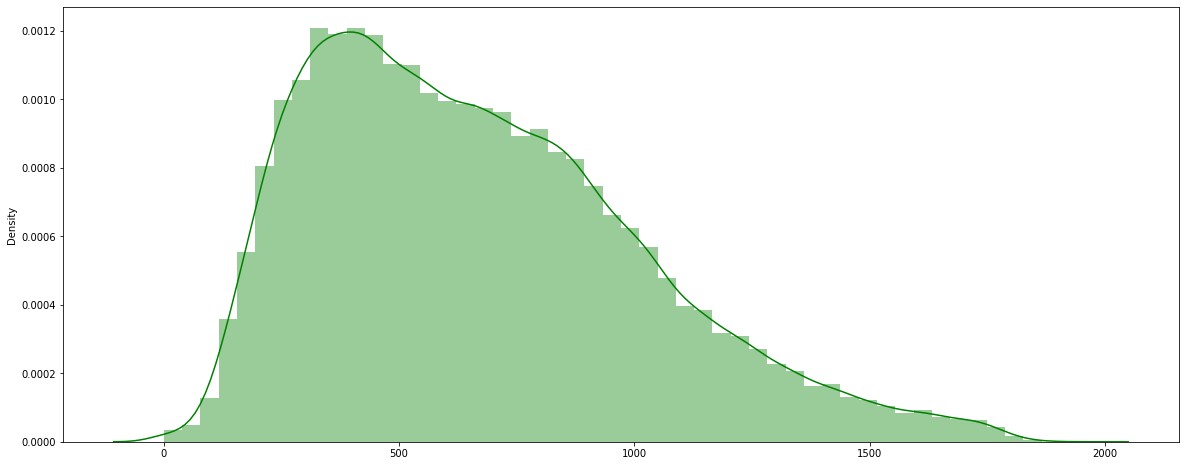

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

art_len = []
for i in df_stories.cleaned_stories:
    art_len.append(len(i.split()))
plt.figure(figsize=(20,8))
sns.distplot(art_len,color='g');